<a href="https://colab.research.google.com/github/Tejaswi-kashyap-006/Autoencoder/blob/main/Autoencoder_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


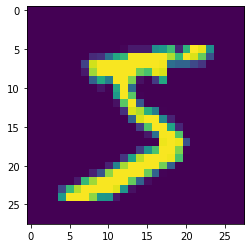

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer =SGD(learning_rate=1.5),
                    metrics =['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train, epochs=5,
                validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2535 - accuracy: 0.0830 - val_loss: 0.2156 - val_accuracy: 0.1275
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1889 - accuracy: 0.1599 - val_loss: 0.1642 - val_accuracy: 0.1858
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1592 - accuracy: 0.1969 - val_loss: 0.1479 - val_accuracy: 0.1985
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1454 - accuracy: 0.2143 - val_loss: 0.1389 - val_accuracy: 0.2109
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1376 - accuracy: 0.2267 - val_loss: 0.1361 - val_accuracy: 0.2160


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 188ms/step


Original Image


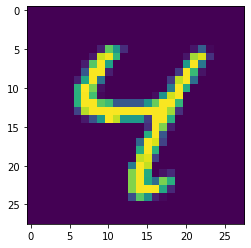

Attemted Reconstruction(after autoencoder)


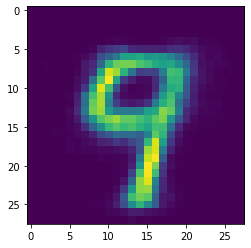

In [ ]:
n = 6
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print('Attemted Reconstruction(after autoencoder)')
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[:10], training=True)

Original


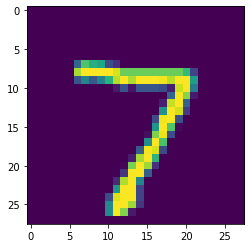

Noisy Version


<function matplotlib.pyplot.show(*args, **kw)>

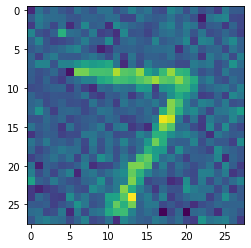

In [ ]:
n = 0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noisy Version")
plt.imshow(noisey[n])
plt.show

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
noise_remover = Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(loss ='binary_crossentropy',
                      optimizer ='adam',
                      metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train,X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1698 - accuracy: 0.1809
Epoch 2/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1306 - accuracy: 0.2319
Epoch 3/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1217 - accuracy: 0.2444
Epoch 4/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1162 - accuracy: 0.2539
Epoch 5/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1124 - accuracy: 0.2606
Epoch 6/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1095 - accuracy: 0.2656
Epoch 7/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1077 - accuracy: 0.2690
Epoch 8/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1061 - accuracy: 0.2707


In [ ]:
ten_noisey_images = sample(X_test[:10],training=True)

denoised = noise_remover(ten_noisey_images)

orininal Image


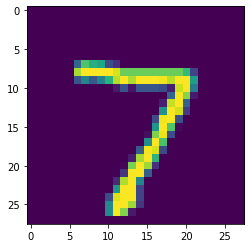

Noise added Image


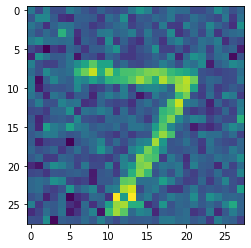

After noise removal from autoencoder


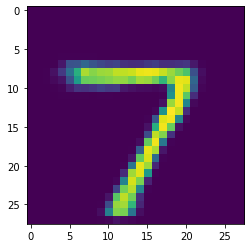

In [ ]:
n = 0
print("orininal Image")
plt.imshow(X_test[n])
plt.show()
print("Noise added Image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After noise removal from autoencoder")
plt.imshow(denoised[n])
plt.show()
